# SpatialLIBD

## 1. Download all samples from SpatialLIBD

In [1]:
main_data_dir_name <- "data"
dataset_dir_name <- "SpatialLIBD"
dataset_dir_path <- file.path(main_data_dir_name, dataset_dir_name)
data_r_object_name <- "spe.rds"
data_r_object_path <- file.path(dataset_dir_path, data_r_object_name)
print(data_r_object_path)

[1] "data/SpatialLIBD/spe.rds"


In [2]:
# Check if parent data directory and dataset directory exists. If not, create.
if (!file.exists(main_data_dir_name))
    dir.create(main_data_dir_name)
if (!file.exists(dataset_dir_path))
    dir.create(dataset_dir_path)

In [3]:
# If dataset object file does not exist, download the object and save it.
if (!file.exists(dataset_dir_path)) {
    if (!requireNamespace("BiocManager", quietly = TRUE))
        install.packages("BiocManager")

    if (!requireNamespace("spatialLIBD", quietly = TRUE))
        BiocManager::install("spatialLIBD")

    library("spatialLIBD")

    # set timeout to 10 minutes because simultaneous download of samples leads to timeout
    # default: 60 seconds
    options(timeout = 600)

    spe <- fetch_data(type = "spe")

    # set timeout back to default value
    options(timeout = 60)

    # save object to file
    saveRDS(spe, file=data_r_object_path)
} else {
    spe <- readRDS(data_r_object_path)
}


In [4]:
spe

Loading required package: SpatialExperiment

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, 

class: SpatialExperiment 
dim: 33538 47681 
metadata(0):
assays(2): counts logcounts
rownames(33538): ENSG00000243485 ENSG00000237613 ... ENSG00000277475
  ENSG00000268674
rowData names(9): source type ... gene_search is_top_hvg
colnames(47681): AAACAACGAATAGTTC-1 AAACAAGTATCTCCCA-1 ...
  TTGTTTCCATACAACT-1 TTGTTTGTGTAAATTC-1
colData names(69): sample_id Cluster ... array_row array_col
reducedDimNames(6): PCA TSNE_perplexity50 ... TSNE_perplexity80
  UMAP_neighbors15
mainExpName: NULL
altExpNames(0):
spatialCoords names(2) : pxl_col_in_fullres pxl_row_in_fullres
imgData names(4): sample_id image_id data scaleFactor

In [8]:
sample_ids <- unique(colData(spe)[['sample_id']])

In [12]:
samples <- lapply(sample_ids, function(sample_id) {
    spe[,spe$sample_id == sample_id]
})

In [14]:
names(samples) <- sample_ids

In [15]:
samples

$`151507`
class: SpatialExperiment 
dim: 33538 4226 
metadata(0):
assays(2): counts logcounts
rownames(33538): ENSG00000243485 ENSG00000237613 ... ENSG00000277475
  ENSG00000268674
rowData names(9): source type ... gene_search is_top_hvg
colnames(4226): AAACAACGAATAGTTC-1 AAACAAGTATCTCCCA-1 ...
  TTGTTTCCATACAACT-1 TTGTTTGTGTAAATTC-1
colData names(69): sample_id Cluster ... array_row array_col
reducedDimNames(6): PCA TSNE_perplexity50 ... TSNE_perplexity80
  UMAP_neighbors15
mainExpName: NULL
altExpNames(0):
spatialCoords names(2) : pxl_col_in_fullres pxl_row_in_fullres
imgData names(4): sample_id image_id data scaleFactor

$`151508`
class: SpatialExperiment 
dim: 33538 4384 
metadata(0):
assays(2): counts logcounts
rownames(33538): ENSG00000243485 ENSG00000237613 ... ENSG00000277475
  ENSG00000268674
rowData names(9): source type ... gene_search is_top_hvg
colnames(4384): AAACAAGTATCTCCCA-1 AAACAATCTACTAGCA-1 ...
  TTGTTTGTATTACACG-1 TTGTTTGTGTAAATTC-1
colData names(69): sample_id Clu

In [21]:
sample_image_sources <- lapply(sample_ids, function(sample_id) {
    imgSource(samples[[sample_id]])
})

In [22]:
sample_image_sources

[[1]]
[1] "https://spatial-dlpfc.s3.us-east-2.amazonaws.com/images/151507_tissue_lowres_image.png"

[[2]]
[1] "https://spatial-dlpfc.s3.us-east-2.amazonaws.com/images/151508_tissue_lowres_image.png"

[[3]]
[1] "https://spatial-dlpfc.s3.us-east-2.amazonaws.com/images/151509_tissue_lowres_image.png"

[[4]]
[1] "https://spatial-dlpfc.s3.us-east-2.amazonaws.com/images/151510_tissue_lowres_image.png"

[[5]]
[1] "https://spatial-dlpfc.s3.us-east-2.amazonaws.com/images/151669_tissue_lowres_image.png"

[[6]]
[1] "https://spatial-dlpfc.s3.us-east-2.amazonaws.com/images/151670_tissue_lowres_image.png"

[[7]]
[1] "https://spatial-dlpfc.s3.us-east-2.amazonaws.com/images/151671_tissue_lowres_image.png"

[[8]]
[1] "https://spatial-dlpfc.s3.us-east-2.amazonaws.com/images/151672_tissue_lowres_image.png"

[[9]]
[1] "https://spatial-dlpfc.s3.us-east-2.amazonaws.com/images/151673_tissue_lowres_image.png"

[[10]]
[1] "https://spatial-dlpfc.s3.us-east-2.amazonaws.com/images/151674_tissue_lowres_image.png"

[[11]]
[1] "https://spatial-dlpfc.s3.us-east-2.amazonaws.com/images/151675_tissue_lowres_image.png"

[[12]]
[1] "https://spatial-dlpfc.s3.us-east-2.amazonaws.com/images/151676_tissue_lowres_image.png"

In [23]:
sample_images <- lapply(sample_ids, function(sample_id) {
    imgRaster(samples[[sample_id]],
        sample_id = sample_id,
        image_id = imgData(samples[[sample_id]])$image_id
        )
})

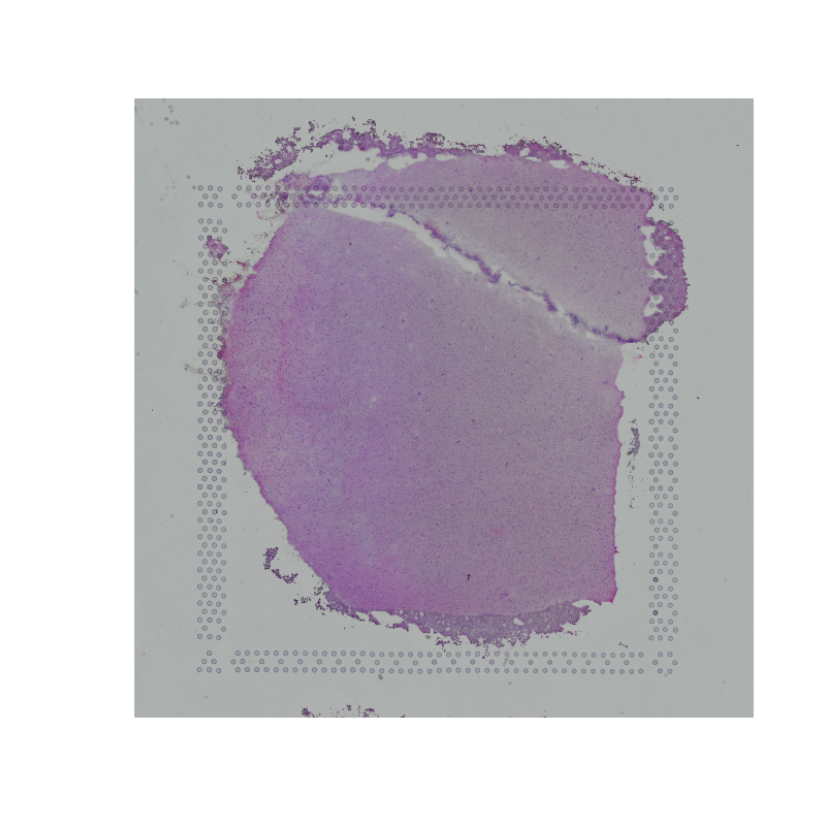

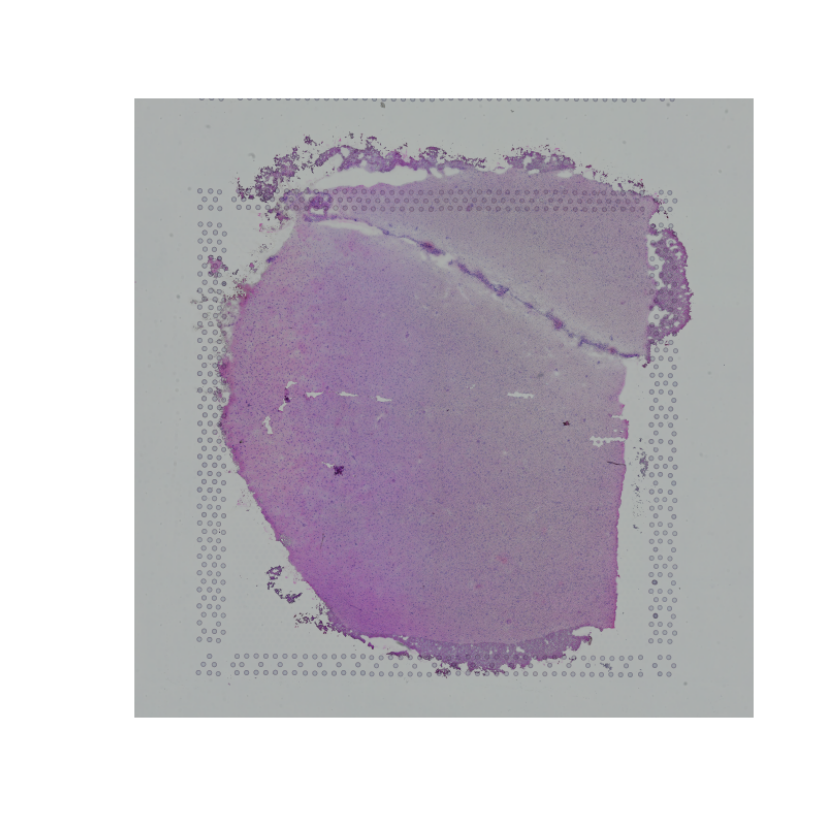

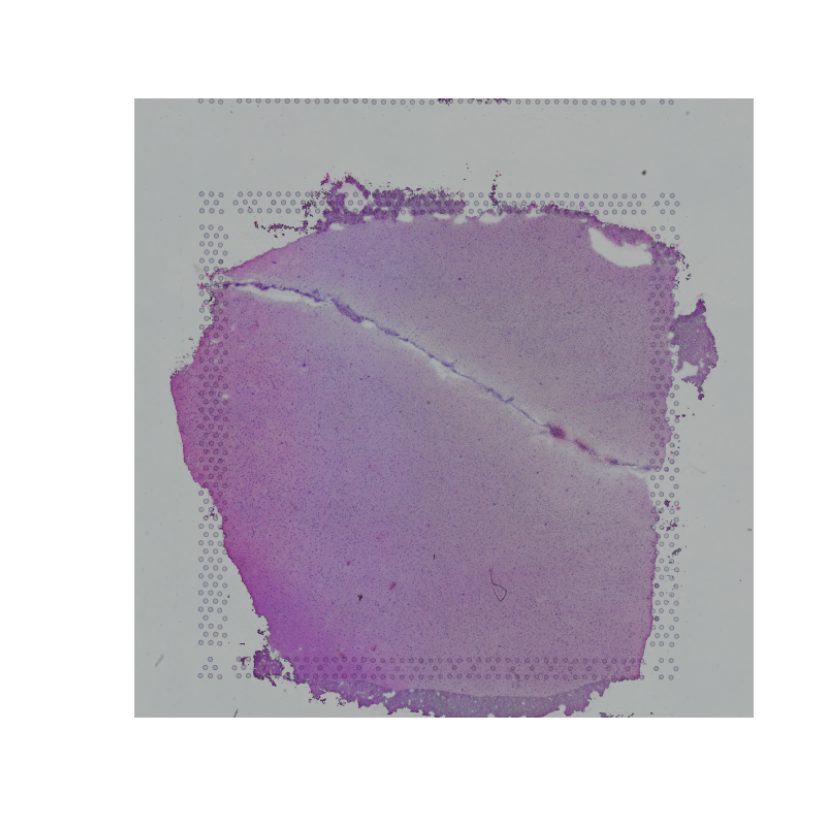

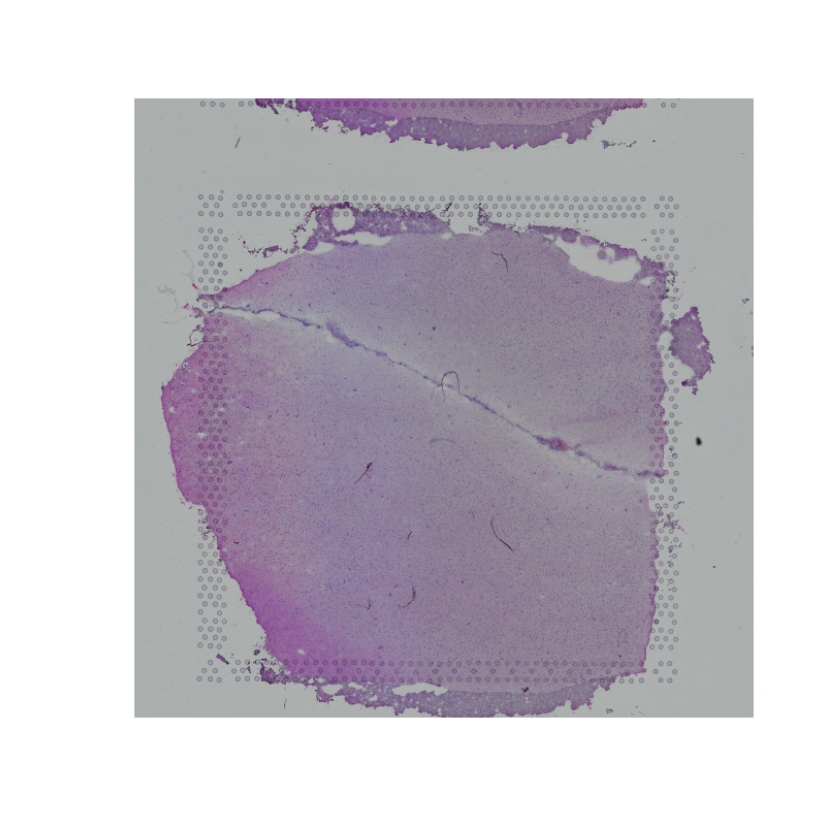

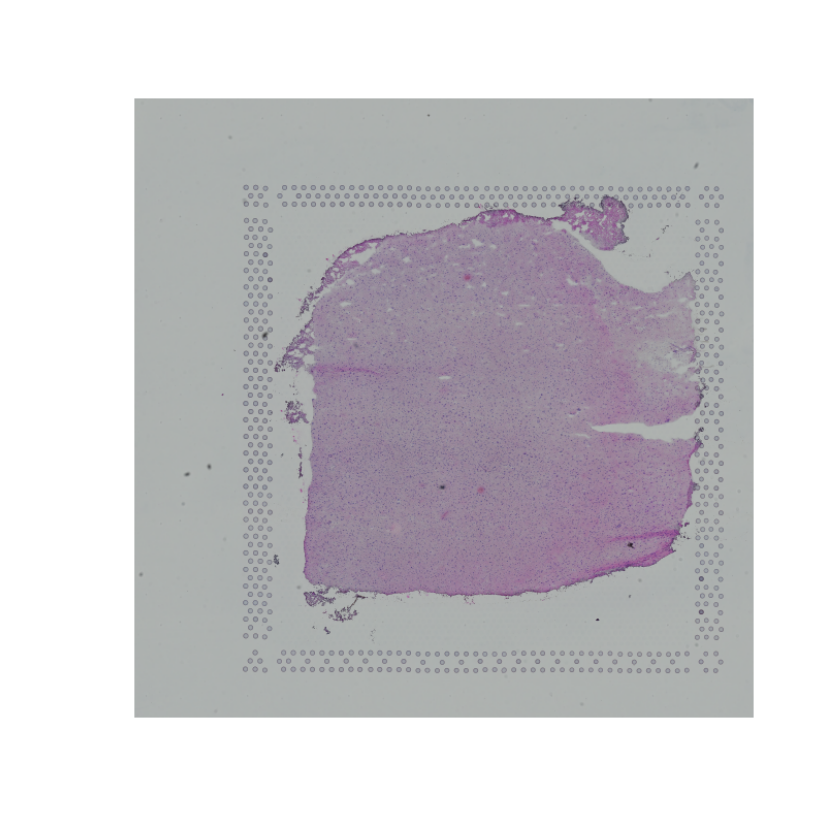

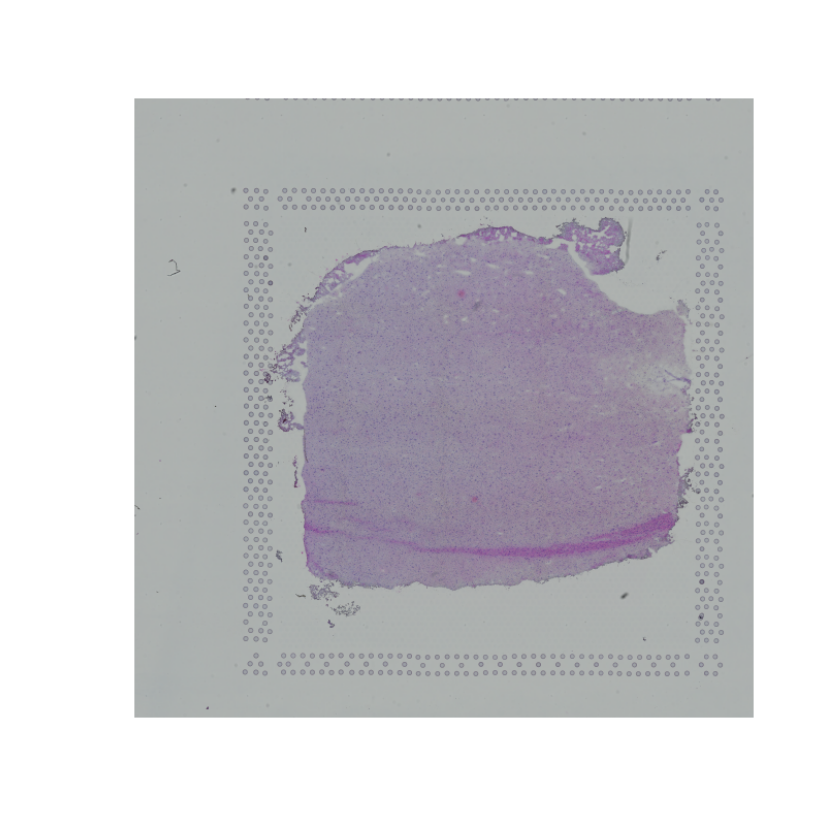

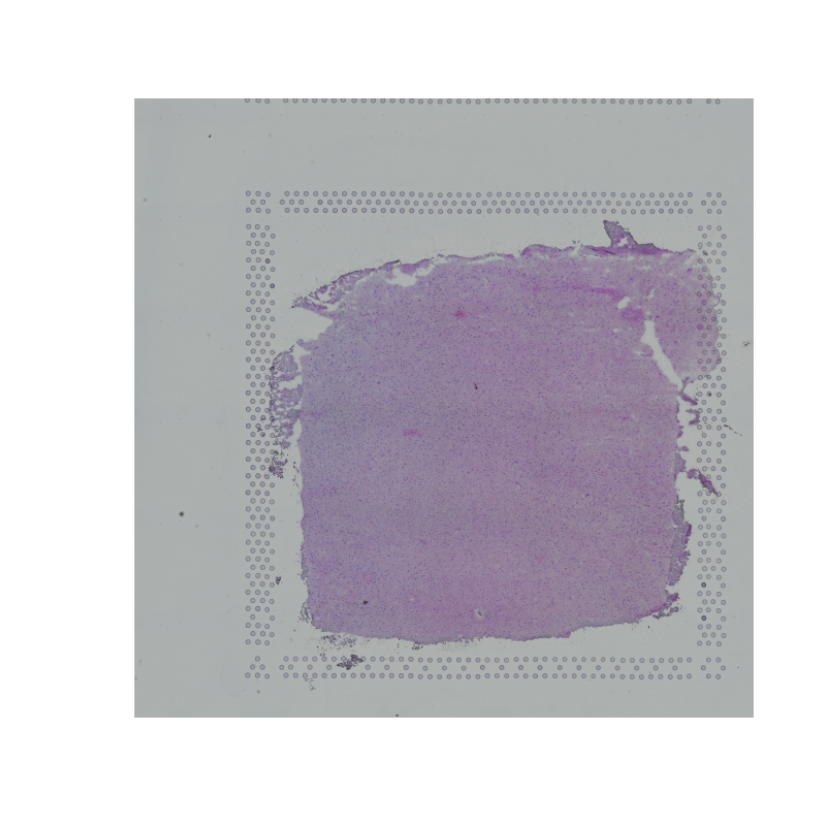

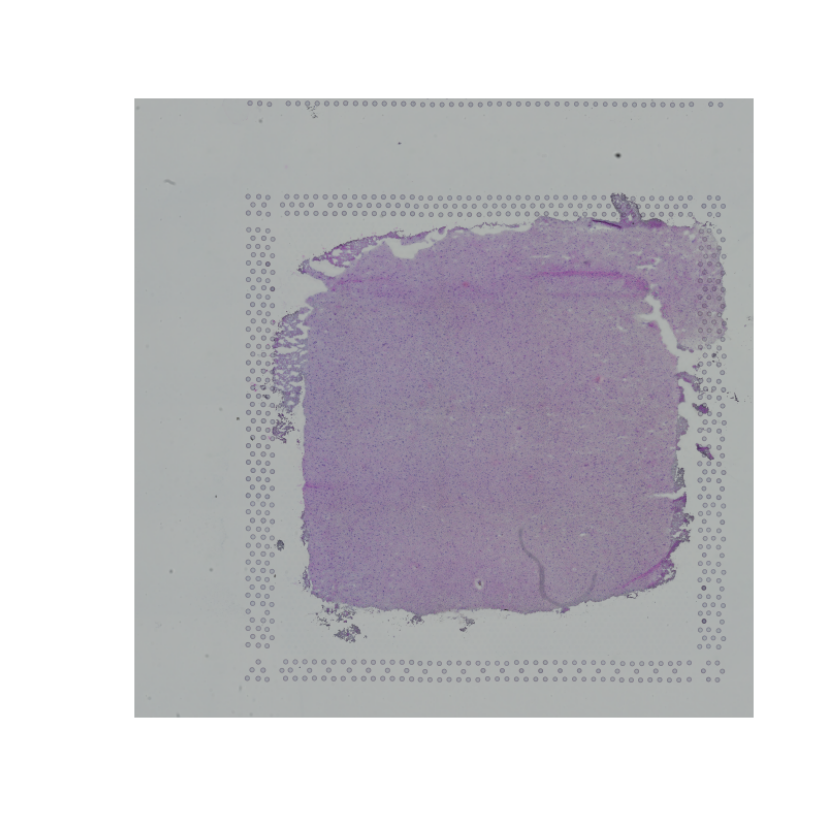

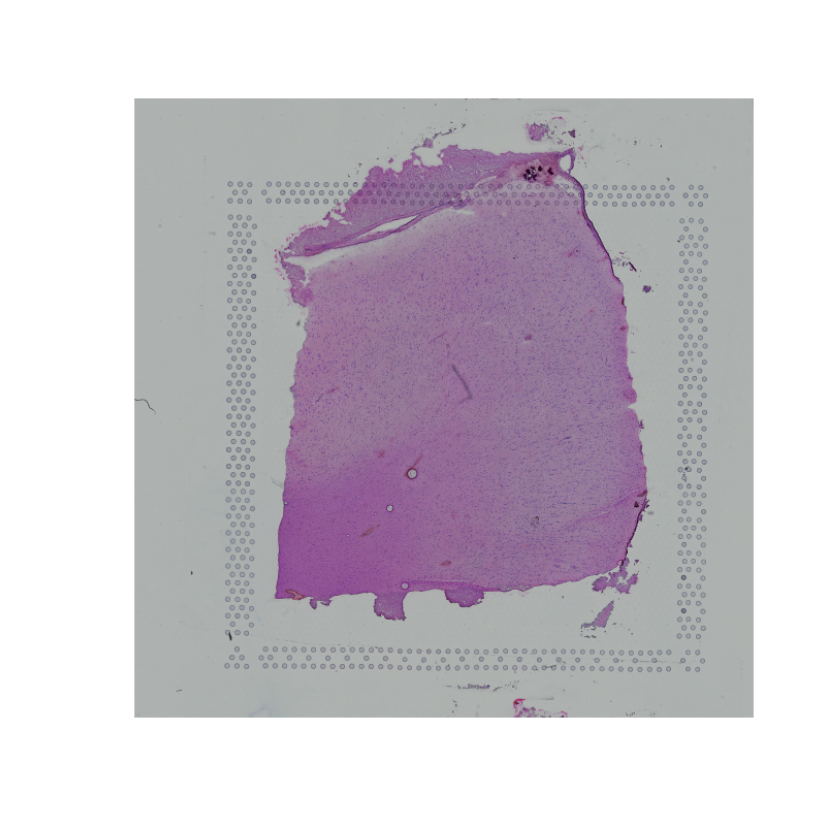

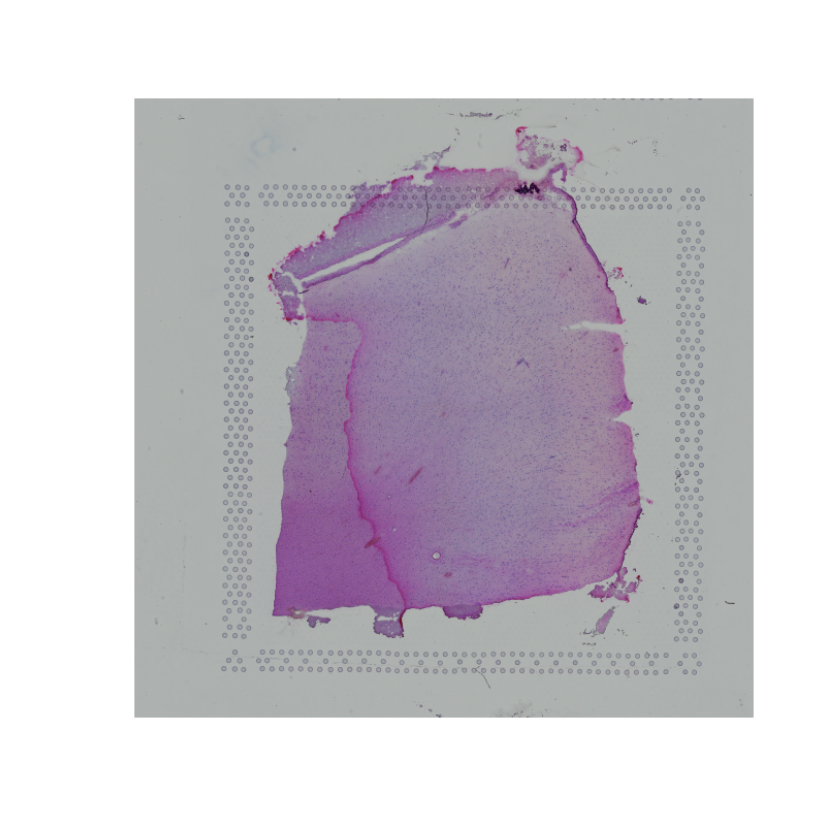

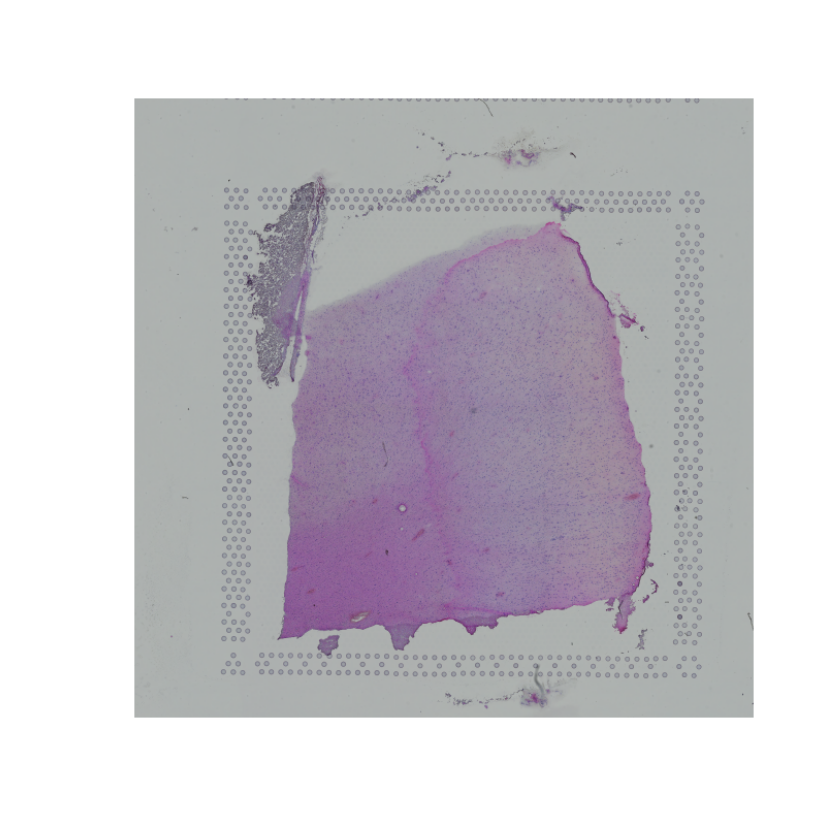

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

[[7]]
NULL

[[8]]
NULL

[[9]]
NULL

[[10]]
NULL

[[11]]
NULL

[[12]]
NULL

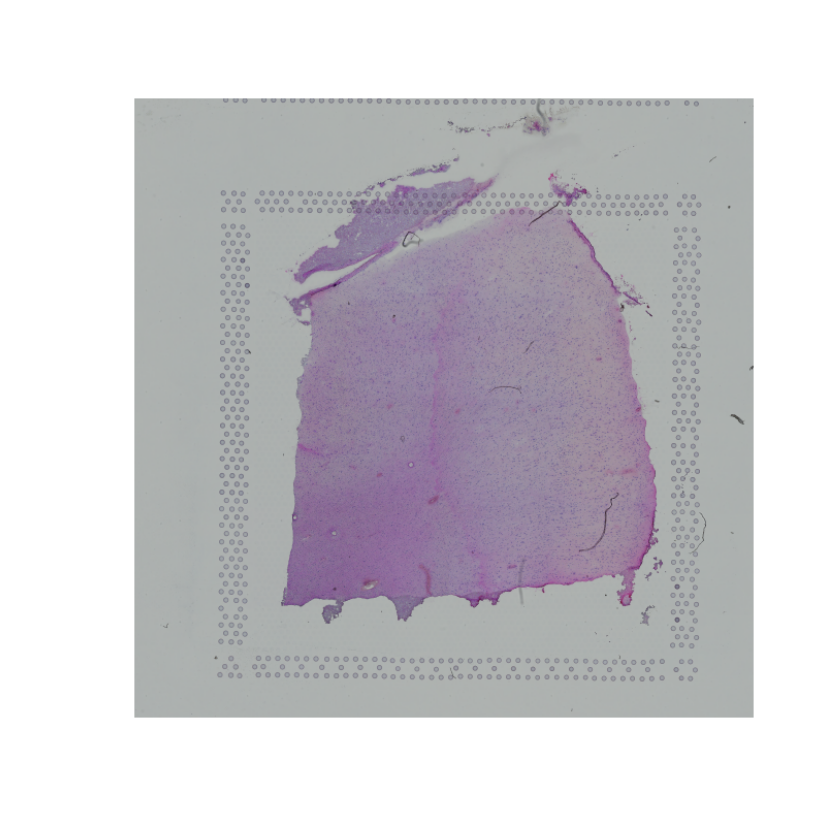

In [28]:
lapply(sample_images, plot)

In [33]:
sample_images[[1]][1,1:10]

     [,1]        [,2]        [,3]        [,4]        [,5]        [,6]       
[1,] "#abafaeff" "#abafaeff" "#abafaeff" "#abafaeff" "#abb0aeff" "#acb0aeff"
     [,7]        [,8]        [,9]        [,10]      
[1,] "#abafaeff" "#abafaeff" "#abafadff" "#acb0aeff"

In [5]:
sessionInfo()

R version 4.2.3 (2023-03-15)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 22.04.3 LTS

Matrix products: default
BLAS/LAPACK: /home/edgar/miniconda3/envs/STanndata/lib/libopenblasp-r0.3.23.so

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] SpatialExperiment_1.8.0     SingleCellExperiment_1.20.0
 [3] SummarizedExperiment_1.28.0 Biobase_2.58.0             
 [5] GenomicRanges_1.50.0        GenomeInfoDb_1.34.9        
 [7] IRanges_2.32.0              S4Vectors_0.36.0           
 [9] BiocGenerics_0.44.0         MatrixGenerics_1.10.0      
[11] matrixStats_1.2.0          

loaded 